In [3]:
#Завдання 1
from pulp import LpProblem, LpMaximize, LpVariable

# Створюємо модель оптимізації
model = LpProblem(name="Production_Optimization", sense=LpMaximize)

# Оголошуємо змінні рішення - кількість одиниць "Лимонаду" та "Фруктового соку"
x1 = LpVariable(name="Lemonade", lowBound=0, cat="Integer")
x2 = LpVariable(name="FruitJuice", lowBound=0, cat="Integer")

# Цільова функція для максимізації виробництва
model += x1 + x2

# Додаємо обмеження ресурсів
model += 2 * x1 + x2 <= 100   # Вода
model += x1 <= 50             # Цукор
model += x1 <= 30             # Лимонний сік
model += 2 * x2  <= 40    # Фруктове пюре

# Розв'язуємо задачу
model.solve()

# Виводимо результати
print(f"Optimal quantity of Lemonade: {int(x1.value())}")
print(f"Optimal quantity of Fruit Juice: {int(x2.value())}")
print(f"Maximum production: {int(model.objective.value())}")

Optimal quantity of Lemonade: 30
Optimal quantity of Fruit Juice: 20
Maximum production: 50


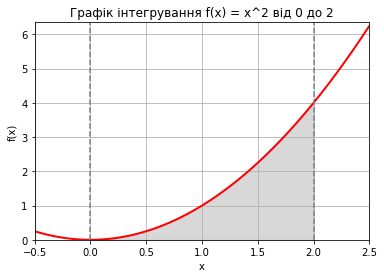

Інтеграл:  2.666666666666667
Обчислення інтеграла за допмогою метод Монте-Карло: 
Кількість точок: 10000 , інтеграл: 2.6968
Кількість точок: 20000 , інтеграл: 2.6788
Кількість точок: 50000 , інтеграл: 2.68128
Кількість точок: 10 , інтеграл: 3.2
Кількість точок: 100 , інтеграл: 2.64
Кількість точок: 1000 , інтеграл: 2.648


In [2]:
#Завдання 2
import matplotlib.pyplot as plt
import scipy.integrate as spi
import numpy as np
import random


# Визначення функції та межі інтегрування
def f(x):
    return x**2


a = 0  # Нижня межа
b = 2  # Верхня межа

# Створення діапазону значень для x
x = np.linspace(-0.5, 2.5, 400)
y = f(x)

# Створення графіка
fig, ax = plt.subplots()

# Малювання функції
ax.plot(x, y, "r", linewidth=2)

# Заповнення області під кривою
ix = np.linspace(a, b)
iy = f(ix)
ax.fill_between(ix, iy, color="gray", alpha=0.3)

# Налаштування графіка
ax.set_xlim([x[0], x[-1]])
ax.set_ylim([0, max(y) + 0.1])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

# Додавання меж інтегрування та назви графіка
ax.axvline(x=a, color="gray", linestyle="--")
ax.axvline(x=b, color="gray", linestyle="--")
ax.set_title("Графік інтегрування f(x) = x^2 від " + str(a) + " до " + str(b))
plt.grid()
plt.show()


# Обчислення значення інтеграла функції за допомогою методу Монте-Карло
def monte_carlo_integral_calculation(num_points):
    random_x = np.random.uniform(a, b, num_points)
    random_y = np.random.uniform(0, f(b), num_points)

    # Обчислення кількості точок, які потрапили під криву
    points_under_curve = sum(random_y <= f(random_x))

    # Обчислення відсотка площі під кривою
    area_ratio = points_under_curve / num_points

    # Обчислення площі області
    total_area = (b - a) * f(b)

    # Обчислення значення інтегралу
    integral_value = total_area * area_ratio

    return integral_value


# Перевірка
# Обчислення інтеграла за допмогою quad()
result, error = spi.quad(f, a, b)
print("Інтеграл: ", result)

# Обчислення інтеграла за допомогою методу Монте-Карло
num_points = [10000, 20000, 50000, 10, 100, 1000]

print("Обчислення інтеграла за допмогою метод Монте-Карло: ")
for points in num_points:
    print(
        f"Кількість точок: {points} , інтеграл: {monte_carlo_integral_calculation(points)}"
    )